In [3]:

# # Exploration des données d'art algorithmique
# 
# Ce notebook explore le dataset d'art algorithmique (SVG et G-code)


# Imports
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
!pip install matplotlib
%pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)



In [5]:
# %% [python]
# Charger l'index du dataset
data_dir = Path("../data/processed")
index_files = list(data_dir.glob("**/dataset_index.json"))

print(f"Found {len(index_files)} dataset index files")



Found 2 dataset index files


In [6]:
# %% [python]
# Analyser un dataset
def analyze_dataset(index_path):
    with open(index_path, 'r') as f:
        data = json.load(f)
    
    df = pd.DataFrame(data)
    
    print(f"Dataset: {index_path.parent.name}")
    print(f"Total artworks: {len(df)}")
    print(f"Formats: {df['format_type'].unique()}")
    
    if 'metadata' in df.columns:
        # Extraire certaines métriques
        df['element_count'] = df['metadata'].apply(lambda x: x.get('element_count', 0))
        print(f"Avg elements: {df['element_count'].mean():.1f}")
    
    return df



In [7]:
# %% [python]
# Analyser tous les datasets
all_data = []
for idx_file in index_files:
    df = analyze_dataset(idx_file)
    df['dataset'] = idx_file.parent.name
    all_data.append(df)



Dataset: gcode
Total artworks: 100
Formats: ['gcode']
Avg elements: 0.0
Dataset: svg
Total artworks: 100
Formats: ['svg']
Avg elements: 0.0


KeyError: 'content'

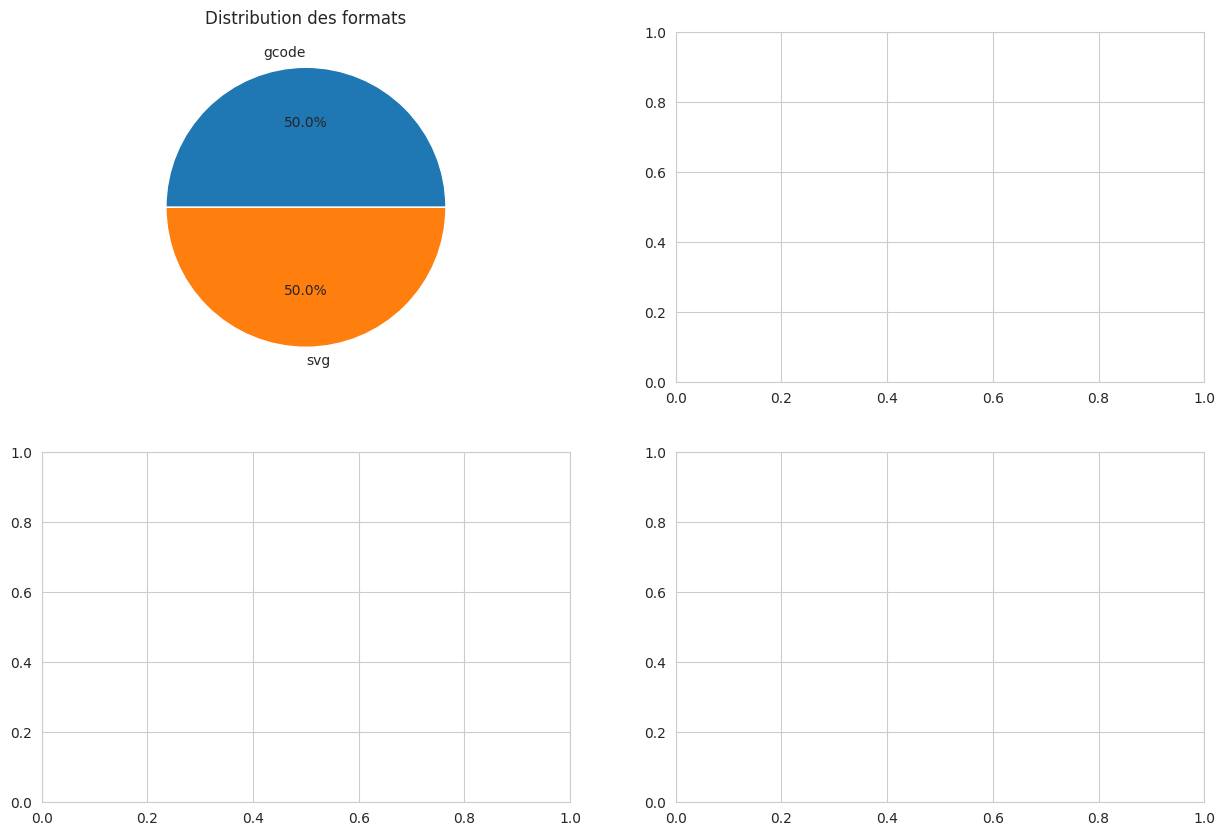

In [ ]:
# %% [python]
# Combiner tous les datasets
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Visualisation
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Distribution des formats
    format_counts = combined_df['format_type'].value_counts()
    axes[0, 0].pie(format_counts.values, labels=format_counts.index, autopct='%1.1f%%')
    axes[0, 0].set_title('Distribution des formats')
    
    # Taille des fichiers (approximative)
    #combined_df['content_length'] = combined_df['content'].apply(len)
    combined_df['file_size'] = combined_df['file_path'].apply(
    lambda p: Path(p).stat().st_size
    )
    axes[0, 1].hist(combined_df['file_size'], bins=30)
    axes[0, 1].set_xlabel('Taille fichier (bytes)')
    axes[0, 1].set_ylabel('Fréquence')
    axes[0, 1].set_title('Distribution des tailles de fichiers')




   # axes[0, 1].hist(combined_df['content_length'], bins=30, edgecolor='black')
    #axes[0, 1].set_xlabel('Longueur du contenu (caractères)')
   # axes[0, 1].set_ylabel('Fréquence')
    #axes[0, 1].set_title('Distribution des tailles de fichiers')
    
    # Par dataset
    dataset_counts = combined_df['dataset'].value_counts()
    axes[1, 0].bar(range(len(dataset_counts)), dataset_counts.values)
    axes[1, 0].set_xticks(range(len(dataset_counts)))
    axes[1, 0].set_xticklabels(dataset_counts.index, rotation=45)
    axes[1, 0].set_ylabel('Nombre d\'œuvres')
    axes[1, 0].set_title('Œuvres par dataset')
    
    # Métadonnées si disponibles
    if 'metadata' in combined_df.columns:
        # Essayer d'extraire des métriques communes
        pass
    
    plt.tight_layout()
    plt.show()

In [9]:
print(combined_df.columns)


Index(['id', 'format_type', 'metadata', 'file_path', 'element_count',
       'dataset'],
      dtype='object')
